In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
import pandas as pd

upload =files.upload()
a=list(upload.keys())[0]
df = pd.read_csv(a)
df

Saving Wholesale customers data.csv to Wholesale customers data.csv


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [ ]:
df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [ ]:
df.drop(['Channel','Region'],axis=1,inplace=True)

In [ ]:
array=df.values

In [ ]:
array

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]])

In [ ]:
stscalar=StandardScaler().fit(array)
x=stscalar.fit_transform(array)

In [ ]:
x

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [ ]:
dbscan=DBSCAN(eps=0.9,min_samples=6)
dbscan.fit(x)

DBSCAN(eps=0.9, min_samples=6)

In [ ]:
dbscan.labels_

array([ 0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,
        0,  0,  0,  0,  0

In [ ]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [ ]:
cl

,cluster
0,0
1,0
2,-1
3,0
4,0
...,...
435,-1
436,0
437,-1
438,0


In [ ]:
pd.concat([df,cl],axis=1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,-1
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,-1
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,-1
438,10290,1981,2232,1038,168,2125,0


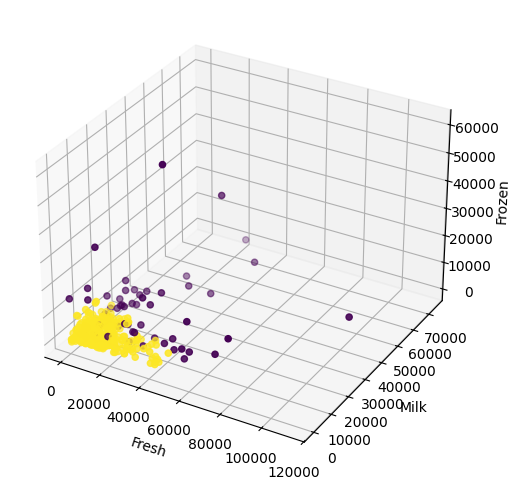

In [ ]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['Fresh'],df['Milk'],df['Frozen'],c=dbscan.labels_)
ax.set_xlabel('Fresh')
ax.set_ylabel('Milk')
ax.set_zlabel('Frozen')
plt.show()

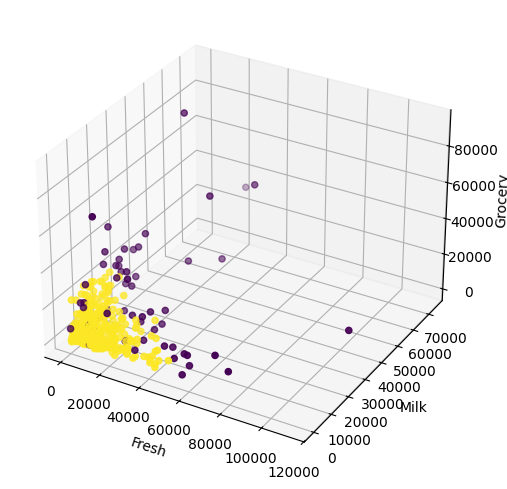

In [ ]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['Fresh'],df['Milk'],df['Grocery'],c=dbscan.labels_)
ax.set_xlabel('Fresh')
ax.set_ylabel('Milk')
ax.set_zlabel('Grocery')
plt.show()